<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

https://drive.google.com/file/d/1IMX_F2lK__JvbpZ4nKBbJIuwSo-yJ3yG/view?usp=sharing - сам датасет

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings

# Отключить все предупреждения
warnings.filterwarnings("ignore")

# Ваш код здесь


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [263]:
file_path = 'C:\IDE\project1\dst-3.0_16_1_hh_database (1).csv'

# Чтение данных из CSV файла
data = pd.read_csv(file_path, sep=';')  # или sep='\t'
# Вывод первых нескольких строк для проверки
print(data.head())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

In [264]:
size = data.shape  # возвращает кортеж (число строк, число столбцов)

print(size)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [265]:
print("\nПоследние 5 строк:")
print(data.tail())


Последние 5 строк:
                                       Пол, возраст           ЗП  \
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                            Город, переезд, командировки  \
44739  Тверь , готов к переезду (Москва, Химки) , гот...   
44740  Липецк , готов к переезду , готов к командировкам   
44741  Челябинск , готова к пе

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [266]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [267]:
# Проверка на пропуски
missing_values = data.isnull().sum()

# Фильтрация признаков с пропусками
missing_features = missing_values[missing_values > 0]

print(missing_features)

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [268]:
statistics = data.describe(include='all') 

print(statistics)

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [269]:
# Функция для извлечения уровня образования
def extract_education(education_str):
    words = education_str.split()[:3]
    education_level = ' '.join(words)
    
    if 'высшее' in education_level.lower():
        return 'высшее'
    elif 'неоконченное' in education_level.lower():
        return 'неоконченное высшее'
    elif 'среднее' in education_level.lower() and 'специальное' in education_level.lower():
        return 'среднее специальное'
    elif 'среднее' in education_level.lower():
        return 'среднее'
    else:
        return None

# Применение функции к столбцу
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education(x))

# Проверка уникальных значений
unique_education_levels = data['Образование'].unique()
print(unique_education_levels)

# Подсчет количества соискателей со средним уровнем образования
average_education_count = data[data['Образование'] == 'среднее'].shape[0]
print(f"Количество соискателей со средним уровнем образования: {average_education_count}")

# Удаление старого признака
data.drop(columns=['Образование и ВУЗ'], inplace=True)

['высшее' 'среднее специальное' 'среднее']
Количество соискателей со средним уровнем образования: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [270]:
# Функция для извлечения пола и возраста
def extract_gender_age(gender_age_str):
    parts = gender_age_str.split(' , ')
    gender = parts[0].strip()
    age_str = parts[1].strip()
    
    # Определяем пол
    if 'Мужчина' in gender:
        gender_code = 'М'
    elif 'Женщина' in gender:
        gender_code = 'Ж'
    else:
        gender_code = None
    
    # Извлекаем возраст
    age = int(''.join(filter(str.isdigit, age_str)))
    
    return gender_code, age

# Применяем функцию и создаем новые столбцы
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_age(x)))

# Удаляем старый признак
data.drop(columns=['Пол, возраст'], inplace=True)

# Рассчитываем процент женских резюме
total_resumes = data.shape[0]
female_resumes = data[data['Пол'] == 'Ж'].shape[0]
female_percentage = (female_resumes / total_resumes) * 100
female_percentage_rounded = round(female_percentage, 2)

print(f"Процент женских резюме: {female_percentage_rounded}%")

# Рассчитываем средний возраст соискателей
average_age = data['Возраст'].mean()
average_age_rounded = round(average_age, 1)

print(f"Средний возраст соискателей: {average_age_rounded}")


Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [271]:
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)
#data = data.drop('Опыт работы', axis=1)
print(round(data['Опыт работы (месяц)'].median()))

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [272]:
def get_city(arg):
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород',
        'Казань', 'Челябинск', 'Омск', 'Самара', 
        'Ростов-на-Дону', 'Уфа', 'Красноярск', 
        'Пермь', 'Воронеж', 'Волгоград'
    ]
    
    city = arg.split(' , ')[0].strip()  # Убираем лишние пробелы
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'

def get_ready_to_move(arg):
    return not ('не готов к переезду' in arg or 'не готова к переезду' in arg)

def get_ready_for_business_trips(arg):
    if 'командировка' in arg:
        return not ('не готов к командировкам' in arg or 'не готова к командировкам' in arg)
    return False

# Применяем функции к столбцу
data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_ready_to_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_ready_for_business_trips)

# Удаляем ненужный столбец
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# Выводим результаты
print(round(data['Город'].value_counts(normalize=True).get('Санкт-Петербург', 0) * 100)) 
print(round(data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] * 100))

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [273]:
# Шаг 1: Определение категорий
employments = ['полная занятость', 'частичная занятость', 
               'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
          'гибкий график', 'удаленная работа', 
          'вахтовый метод']

# Шаг 2: Создание бинарных признаков
for employment, chart in zip(employments, charts):
    data[employment] = data['Занятость'].apply(lambda x: employment in x)
    data[chart] = data['График'].apply(lambda x: chart in x)

# Шаг 3: Удаление старых столбцов
data = data.drop('Занятость', axis=1)
data = data.drop('График', axis=1)

# Шаг 4: Подсчёт людей с определёнными комбинациями
project_volunteer_count = data[data['проектная работа'] & data['волонтерство']].shape[0]
shift_flexible_count = data[data['вахтовый метод'] & data['гибкий график']].shape[0]

# Вывод результатов
print(f'Количество людей, ищущих проектную работу и волонтёрство: {project_volunteer_count}')
print(f'Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_flexible_count}')


Количество людей, ищущих проектную работу и волонтёрство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [274]:
def get_salary_num(arg):
    try:
        salary = float(arg.split(' ')[0])
        return salary
    except (IndexError, ValueError):
        return 0  # Возвращаем 0 или другое значение по умолчанию

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    
    try:
        curr = arg.split(' ')[1].replace('.', '')
        if curr == 'руб':
            return 'RUB'
        return currency_dict.get(curr, None)  # Возвращаем None, если валюта не найдена
    except IndexError:
        return None  # Если не удалось извлечь валюту

# Загрузка данных
rates = pd.read_csv('C:\IDE\project1\ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

# Применение функций
data['ЗП (tmp)'] = data['ЗП'].apply(get_salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(get_salary_currency)

# Объединение данных
merged = data.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date'], 
    how='left')

# Заполнение NaN значений
merged['close'].fillna(1, inplace=True)
merged['proportion'].fillna(1, inplace=True)

# Расчет зарплаты в рублях
data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']

# Удаление временных колонок
data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1, inplace=True)

# Вывод медианы зарплаты
print(round(data['ЗП (руб)'].median() / 1000))



59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

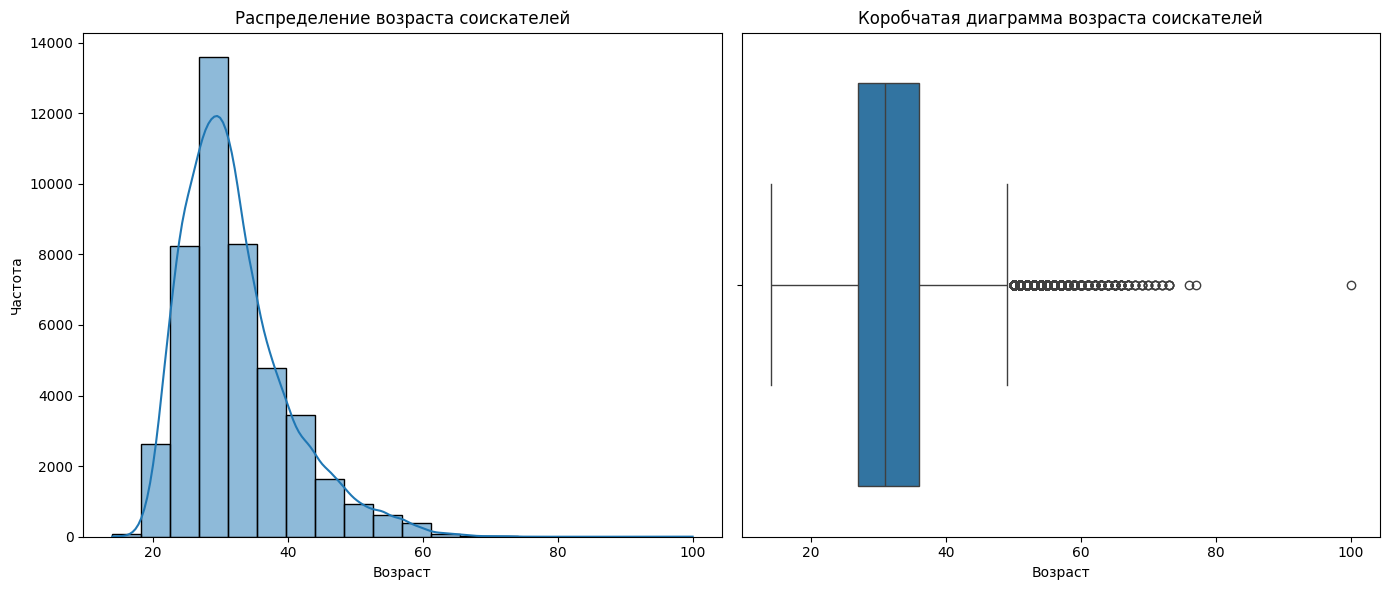

Мода возраста: 30
Предельные значения возраста: 14 - 100


In [275]:
# Построение гистограммы и коробчатой диаграммы
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data['Возраст'], bins=20, kde=True)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Возраст'])
plt.title('Коробчатая диаграмма возраста соискателей')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

# Мода возраста
mode_age = data['Возраст'].mode()[0]
print(f'Мода возраста: {mode_age}')

# Предельные значения возраста
min_age = data['Возраст'].min()
max_age = data['Возраст'].max()
print(f'Предельные значения возраста: {min_age} - {max_age}')

ваши выводы по графику здесь

Мода возраста соискателей составляет 30 лет  

Предельные значения возраста находятся в диапазоне от 14 до 100 лет 

Большинство соискателей находится в возрасте от 18 до 63 лет 

Аномалии в данных могут включать значения, превышающие 3 стандартных отклонения от среднего, что может указывать на наличие выбросов.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

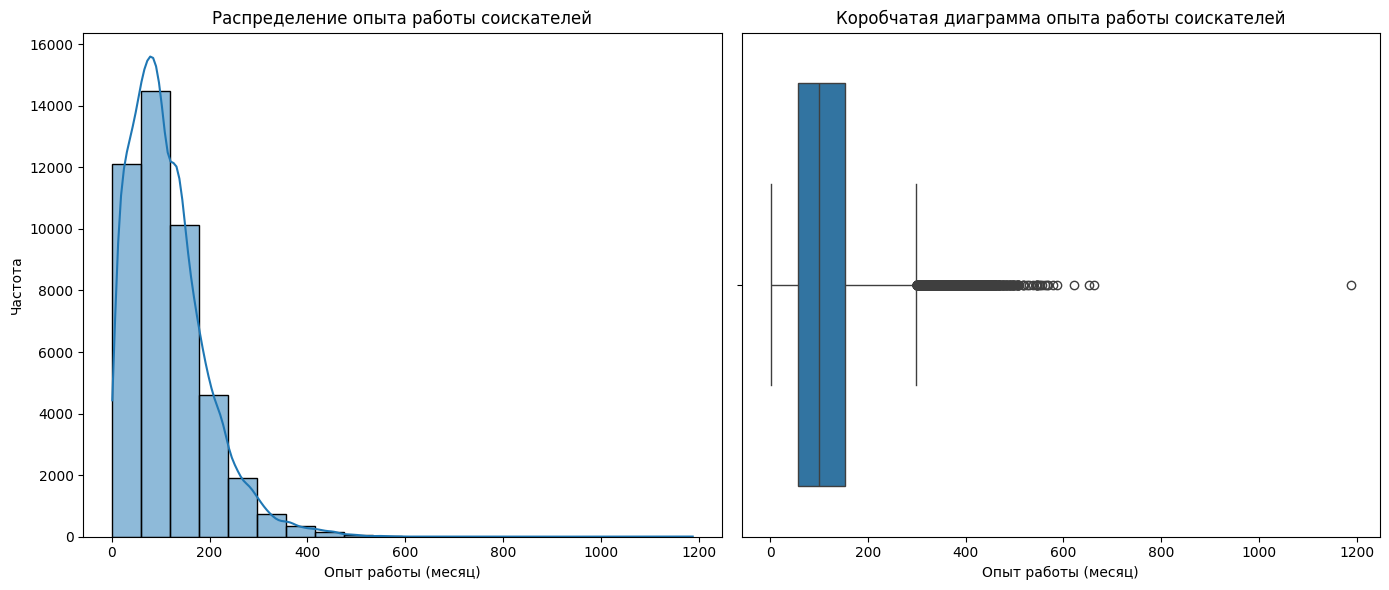

Мода опыта работы: 81.0 месяцев
Предельные значения опыта работы: 1.0 - 1188.0 месяцев
Интервал опыта работы большинства соискателей: 57.0 - 154.0 месяцев
Аномальные значения:
                               Ищет работу на должность:  \
11                                  Технический писатель   
42                                 Ведущий инженер связи   
50                                             Диспетчер   
69                                  Руководитель проекта   
121    Специалист, инженер, руководитель группы, отдела.   
...                                                  ...   
44495                               Руководитель проекта   
44584              Электрик, инженер электрик, энергетик   
44602                                            Инженер   
44645        Специалист отдела информационных технологий   
44655                                   Продакт менеджер   

                                             Опыт работы  \
11     Опыт работы 42 года 6 месяцев  Техни

In [276]:
# Удаление пробелов из названий столбцов
data.columns = data.columns.str.strip()

# Проверка наличия столбца 'Опыт работы (месяц)'
if 'Опыт работы (месяц)' in data.columns:
    plt.figure(figsize=(14, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(data['Опыт работы (месяц)'], bins=20, kde=True)
    plt.title('Распределение опыта работы соискателей')
    plt.xlabel('Опыт работы (месяц)')
    plt.ylabel('Частота')

    # Коробчатая диаграмма
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['Опыт работы (месяц)'])
    plt.title('Коробчатая диаграмма опыта работы соискателей')
    plt.xlabel('Опыт работы (месяц)')

    plt.tight_layout()
    plt.show()

    # Мода
    mode_experience = data['Опыт работы (месяц)'].mode()[0]
    print(f'Мода опыта работы: {mode_experience} месяцев')

    # Предельные значения
    min_experience = data['Опыт работы (месяц)'].min()
    max_experience = data['Опыт работы (месяц)'].max()
    print(f'Предельные значения опыта работы: {min_experience} - {max_experience} месяцев')

    # Интервал большинства соискателей
    Q1 = data['Опыт работы (месяц)'].quantile(0.25)
    Q3 = data['Опыт работы (месяц)'].quantile(0.75)
    print(f'Интервал опыта работы большинства соискателей: {Q1} - {Q3} месяцев')

    # Аномалии
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    anomalies = data[(data['Опыт работы (месяц)'] < lower_bound) | (data['Опыт работы (месяц)'] > upper_bound)]
    
    if not anomalies.empty:
        print(f'Аномальные значения:\n{anomalies}')
    else:
        print('Аномальных значений не найдено.')

    # Максимальный опыт работы
    print(f'Максимальный опыт работы: {max_experience} месяцев')
else:
    print("Столбец 'Опыт работы (месяц)' не найден.")



ваши выводы здесь

Мода распределения равна 81.0 месяцев 

Предельные значения:  Большинство соискателей имеют опыт работы от 57 до 154 месяцев (от 4 лет и 9 месяцев до 12 лет и 10 месяцев). Это говорит о том, что основная часть рынка труда занята людьми со средним и выше среднего опытом.

Аномальные значения:  есть 1276 аномальных записей, которые выходят за пределы нормального диапазона. Эти данные могут указывать на соискателей с необычно большим опытом работы, что может быть связано с различными факторами, такими как:
   - Неправильное заполнение данных.
   - Люди, которые работали в одной сфере очень долго.
   - Специфика профессий, где требуется длительный опыт

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


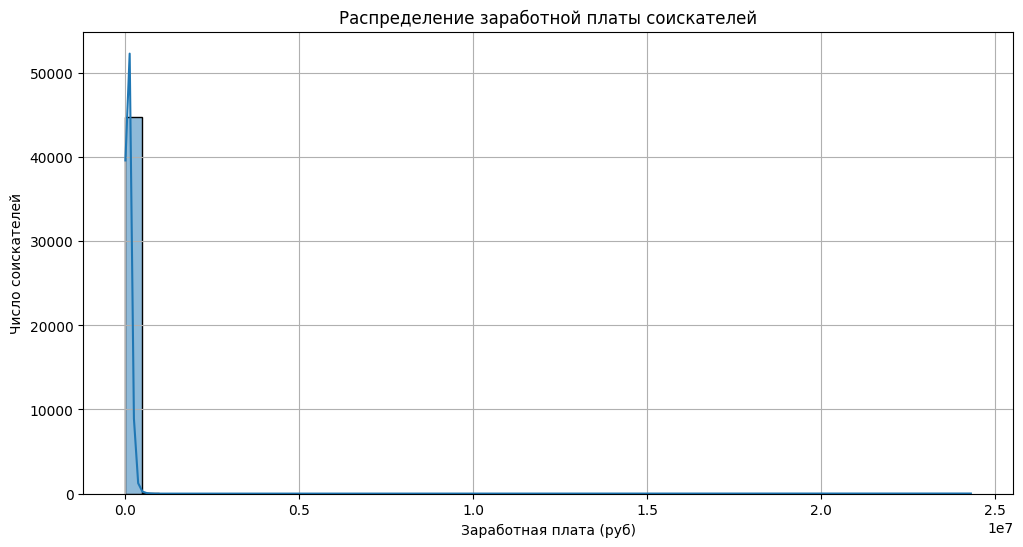

Мода распределения: 50000.0 рублей
Предельные значения: 1.0 - 24304876.0 рублей
Интервал, в котором находится заработная плата большинства соискателей: (np.float64(12212.560000000001), np.float64(300000.0))
Количество соискателей, требующих заработную плату выше 1 миллиона рублей: 5


In [293]:
# Построение распределения признака «ЗП (руб)»
plt.figure(figsize=(12, 6))
sns.histplot(data['ЗП (руб)'], bins=50, kde=True)
plt.title('Распределение заработной платы соискателей')
plt.xlabel('Заработная плата (руб)')
plt.ylabel('Число соискателей')
plt.grid()
plt.show()

# Анализ распределения
mode_salary = data['ЗП (руб)'].mode()[0]  # Мода распределения
min_salary = data['ЗП (руб)'].min()  # Минимальная зарплата
max_salary = data['ЗП (руб)'].max()  # Максимальная зарплата

# Определяем предельные значения и интервал
salary_range = (data['ЗП (руб)'].quantile(0.01), data['ЗП (руб)'].quantile(0.99))

# Поиск аномалий
outliers = data[data['ЗП (руб)'] > 1000000]  # Пример аномалий: зарплата выше 1 миллиона

# Вывод результатов анализа
print(f"Мода распределения: {mode_salary} рублей")
print(f"Предельные значения: {min_salary} - {max_salary} рублей")
print(f"Интервал, в котором находится заработная плата большинства соискателей: {salary_range}")
print(f"Количество соискателей, требующих заработную плату выше 1 миллиона рублей: {len(outliers)}")


ваши выводы здесь
Мода распределения: 50000.0 рублей

Предельные значения: 1.0 - 24304876.0 рублей

аномалии для признака заработной платы:
Количество соискателей, требующих заработную плату выше 1 миллиона рублей: 5


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

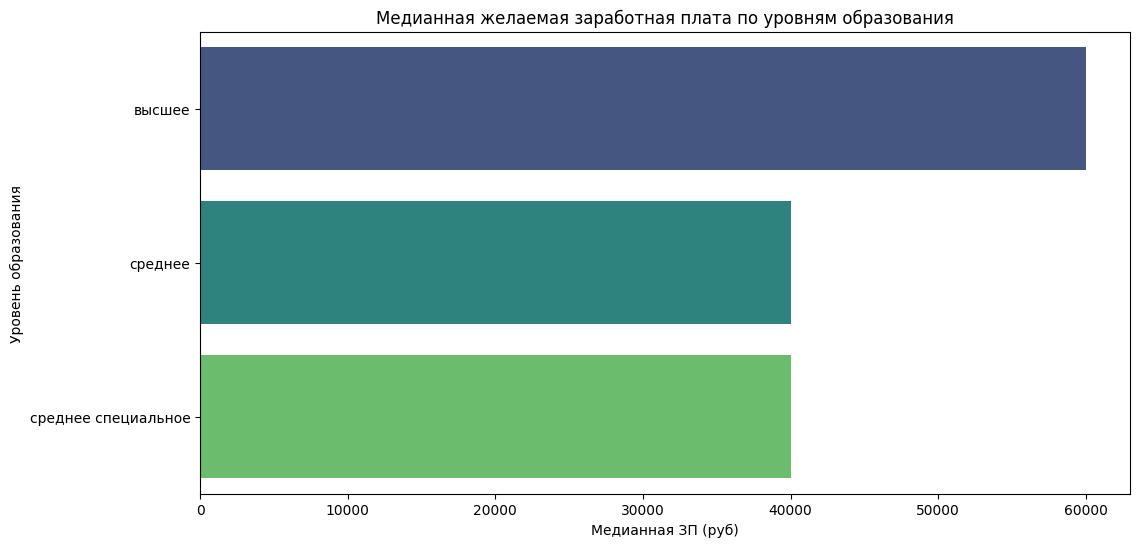

In [278]:
# Фильтрация данных
filtered_data = data[data['ЗП (руб)'] < 1000000]

# Группировка и вычисление медианы
median_salary_by_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Сортировка по медианной зарплате
median_salary_by_education = median_salary_by_education.sort_values(by='ЗП (руб)', ascending=False)

# Построение диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_by_education, palette='viridis')
plt.title('Медианная желаемая заработная плата по уровням образования')
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Уровень образования')
plt.show()

ваши выводы здесь
1. Наибольшие и наименьшие уровни желаемой заработной платы:
   - Наибольший уровень желаемой заработной платы наблюдается у категории с высшим образованием
   - Наименьший уровень  у категорий с среднем или средне специальным.

2. Важность признака уровня образования при прогнозировании заработной платы**:
   - Уровень образования, как правило, является значимым фактором при прогнозировании заработной платы. Более высокий уровень образования часто ассоциируется с более высокой заработной платой из-за квалификации и специальных знаний.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [279]:
# Фильтрация данных: выбираем только зарплаты меньше 1 миллиона рублей
box_data = data[data['ЗП (руб)'] < 1e6]

# Создание коробчатой диаграммы для распределения зарплат по городам
fig = px.box(
    data_frame=box_data,
    x='Город',         # Ось X: Город
    y='ЗП (руб)',      # Ось Y: Зарплата
    color='Город',     # Цвет по городам
    title='Распределение зарплат по городам'  # Заголовок графика
)

# Отображение графика
fig.show()


ваши выводы здесь
### Выводы

На диаграмме представлено распределение медианной желаемой заработной платы по различным городам. Мы можем наблюдать, что города существенно различаются по уровням медианной заработной платы. В Москве медианная зарплата значительно выше, чем в других городаъ, что может говорить о различиях в экономических условиях и спросе на специалистов в этом регионе.

Признак города, безусловно, важен при прогнозировании заработной платы, так как он может влиять на уровень жизни и стоимость труда в разных регионах. Это также может быть связано с наличием крупных компаний, которые предлагают более высокие зарплаты.

Наибольший показатель желаемой заработной платы (~924 тысячи рублей) зафиксирован в городе, который мы можем выделить из отсортированного списка.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [280]:
# Группировка данных и вычисление медианы
bar_data = data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

# Замена значений True/False на Готов/Не готов
bar_data['Готовность к командировкам'] = bar_data['Готовность к командировкам'].replace({True: 'Готов', False: 'Не готов'})
bar_data['Готовность к переезду'] = bar_data['Готовность к переезду'].replace({True: 'Готов', False: 'Не готов'})

# Построение графика
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)

fig.show()


- Работодатели могут рассматривать сотрудников с высокой готовностью к переездам и командировкам как более ценных, что отражается в более высоких предложениях по зарплате.

- Это может также говорить о том, что такие позиции требуют больше ответственности или связаны с дополнительными затратами (например, на поездки), что также может оправдывать более высокую компенсацию.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [281]:
# Создание сводной таблицы
pivot = data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

# Определение градиента 
color_scale = px.colors.sequential.Blues

# Построение графика 
fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale=color_scale,
    title='Медианная з/п по образованию и возрасту'
)

fig.show()



ваши выводы здесь
1. Влияние образования на заработную плату:
   - Наблюдается явная зависимость между уровнем образования и медианной желаемой заработной платой. Люди с высшим образованием, как правило, ожидают более высокую зарплату по сравнению с теми, кто имеет среднее или средне-специальное образование. Это подтверждает гипотезу о том, что уровень образования является ключевым фактором, влияющим на доход.

2. Возрастные группы:
   - Медианная желаемая заработная плата возрастает с увеличением возраста. Наиболее высокие зарплатные ожидания наблюдаются у людей в возрасте 40-50 лет, что может быть связано с накопленным опытом и профессиональными навыками. Молодежь (до 30 лет) имеет более низкие ожидания, что может отражать их начальный уровень карьеры и недостаток опыта.

3. Аномалии и исключения:
   - Важно отметить наличие аномалий в данных, таких как молодые люди (до 18 лет) с высшим образованием, . Это требует дополнительного анализа для понимания реальной картины.
   - Также стоит обратить внимание на пожилых работников(>100лет)


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

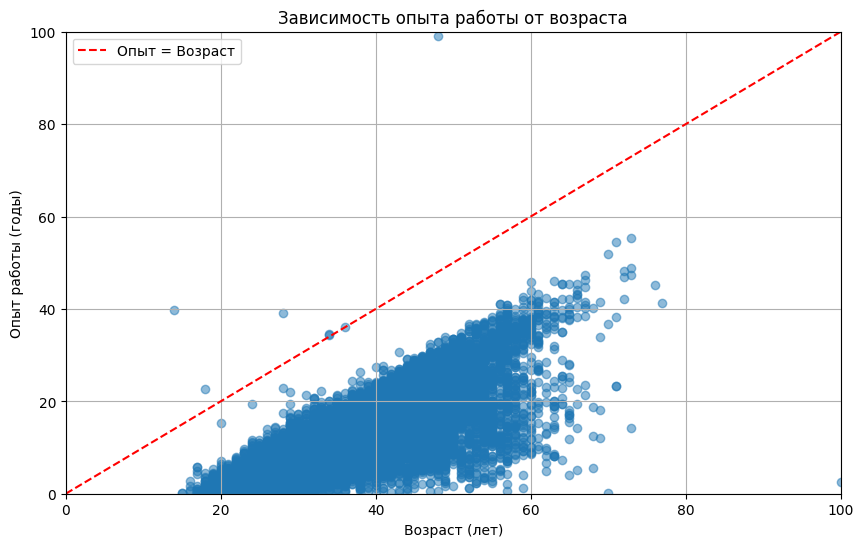

7

In [282]:
# Переводим опыт работы из месяцев в годы
data['Опыт работы (годы)'] = data['Опыт работы (месяц)'] / 12

# Создаем график рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['Возраст'], data['Опыт работы (годы)'], alpha=0.5)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = Возраст')
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (годы)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.grid()
plt.show()

# Фильтрация точек, лежащих строго выше прямой
anomalies = data[data['Опыт работы (годы)'] > data['Возраст']]
number_of_anomalies = len(anomalies)

# Вывод количества аномалий
number_of_anomalies


На графике представлена зависимость опыта работы от возраста. Красная пунктирная линия показывает, где опыт работы равен возрасту. Точки, находящиеся выше этой линии, являются аномалиями, указывающими на то, что опыт работы больше возраста человека. 

В результате анализа данных было выявлено 7 точек, которые лежат строго выше построенной прямой. 


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [283]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Опыт работы                      44576 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

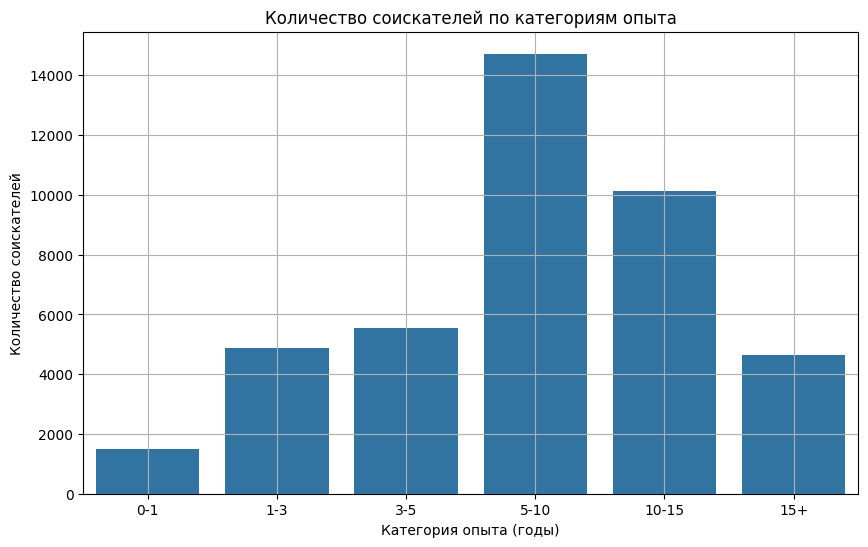

In [284]:
# Создание категорий опыта
bins = [0, 1, 3, 5, 10, 15, 20]
labels = ['0-1', '1-3', '3-5', '5-10', '10-15', '15+']
data['Опыт категории'] = pd.cut(data['Опыт работы (годы)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Опыт категории')
plt.title('Количество соискателей по категориям опыта')
plt.xlabel('Категория опыта (годы)')
plt.ylabel('Количество соискателей')
plt.grid()
plt.show()



- Если наблюдается пик в категории "5-10 года опыта", это может означать, что многие соискатели находятся на этапе активного карьерного роста и ищут новые возможности для развития.

- Соискатели с 5-10 и 10-15 годами опыта часто ищут более высокие позиции или возможности для карьерного роста. Это может свидетельствовать о том, что компании должны предлагать привлекательные условия для удержания таких специалистов.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [286]:
# Поиск полных дубликатов
duplicates = data.duplicated()

# Количество полных копий
num_duplicates = duplicates.sum()

# Удаление полных дубликатов
data_cleaned = data.drop_duplicates()

# Вывод результатов
num_duplicates, data_cleaned.shape[0]


(np.int64(155), 44589)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [287]:
# Вывод информации о числе пропусков в каждом столбце
null_data = data.isnull().sum()
display(null_data[null_data > 0])

Опыт работы                         168
Последнее/нынешнее место работы       1
Последняя/нынешняя должность          2
Опыт работы (месяц)                 170
Опыт работы (годы)                  170
Опыт категории                     3354
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [288]:
# Заполнение пропусков средним значением
data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].mean(), inplace=True)

# Вычисление среднего значения
average_experience = round(data['Опыт работы (месяц)'].mean())
print(f"Результирующее среднее значение в столбце «Опыт работы (месяц)»: {average_experience}")


Результирующее среднее значение в столбце «Опыт работы (месяц)»: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [289]:
# Находим записи с некорректными значениями зарплаты:
# 1. Зарплата больше 1,000,000 рублей
# 2. Зарплата меньше 1,000 рублей
wrong_salary = data[(data['ЗП (руб)'] > 1000000) | (data['ЗП (руб)'] < 1000)]

# Печатаем количество найденных некорректных записей
print(wrong_salary.shape[0])  

# Удаляем некорректные записи из основного DataFrame
cleaned_salary = data.drop(wrong_salary.index, axis=0) 

# Печатаем количество записей после удаления некорректных значений
print(f'Результирующее число записей: {cleaned_salary.shape[0]}')



89
Результирующее число записей: 44655


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [290]:
# Находим выбросы, где опыт работы в годах (Опыт работы (месяц) / 12) больше или равен возрасту
outliers = data[data['Опыт работы (месяц)']/12 >= data['Возраст']]

# Удаляем выбросы из основного DataFrame
data = data.drop(outliers.index)

# Выводим количество выбросов
print(outliers.shape[0])  # Печатаем количество найденных выбросов


7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

3


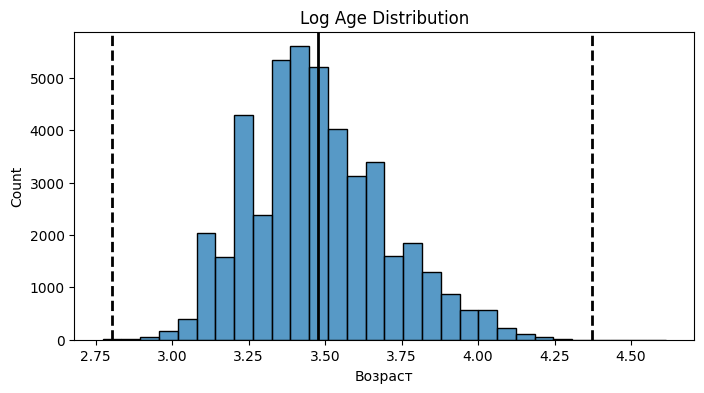

In [291]:
# Создаем фигуру и оси для графика
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Логарифмируем возраст (добавляем 1, чтобы избежать логарифма нуля)
log_age = np.log(data['Возраст'] + 1)

# Строим гистограмму логарифмированного возраста
histplot = sns.histplot(log_age, bins=30, ax=ax)

# Добавляем вертикальную линию для среднего значения
histplot.axvline(log_age.mean(), color='k', lw=2)

# Добавляем линии для верхней и нижней границ (4 стандартных отклонения)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)

# Устанавливаем заголовок графика
histplot.set_title('Log Age Distribution');

# Функция для определения выбросов по z-оценке
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    # Если нужно использовать логарифмическую шкалу
    if log_scale:
        x = np.log(data[feature] + 1)  # Логарифмируем данные
    else:
        x = data[feature]  # Используем исходные данные

    # Вычисляем среднее и стандартное отклонение
    mu = x.mean()
    sigma = x.std()

    # Определяем границы для выбросов
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma

    # Находим выбросы
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    
    # Очищенные данные без выбросов
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned

# Применяем функцию для нахождения выбросов в возрасте
outliers, cleaned_data = outliers_z_score_mod(data, 'Возраст', left=3, right=4, log_scale=True)

# Печатаем количество найденных выбросов
print(outliers.shape[0])
